In [1]:
import sys
sys.path.append('..')

from ml.dataset.corpus import *
from ml.dataset.mappers_preprocess import *
from ml.dataset.mappers_simplify import *
from ml.dataset.mappers_prepare import *
from ml.dataset.processor import *
from ml.dataset.pipeline import *
from ml.dataset.model import *
from IPython.core.display import HTML, display

import matplotlib.pyplot as plt
import pandas as pd
import pychord
import music21
music21.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')

In [2]:
X = np.load('../simple_dataset/X.npy')
y = np.load('../simple_dataset/y.npy')

In [3]:
pred = Predictor()

In [4]:
pred.X = X
pred.y = y
pred.load_dicts('../simple_dataset/simple_dataset_dicts.pickle')

In [5]:
pred.encode()

Shape:  (135674, 16) (135674, 8)
Classes: ['' '-' 'A' 'B-' 'C' 'D' 'E' 'E-' 'F' 'G']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pred.X, pred.y)

In [7]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score
from nottingham_test import custom_scorers
from sklearn.metrics import make_scorer

pred.fit( RandomForestClassifier(n_estimators=20), X_train, y_train)

In [8]:
y_pred = pred.predict(X_test)

In [9]:
print(accuracy_over_axis(y_test, y_pred))

0.6563283115657891


In [18]:
with open('../simple_dataset/rf.pickle', 'wb') as fid:
    pickle.dump(clf, fid)

In [32]:
corpus = SongCorpus()
corpus.load_from_file('../simple_dataset/simple_dataset_SimplifyChordsMapper.pickle',max_count=100)

In [33]:
song = corpus.songs[60]

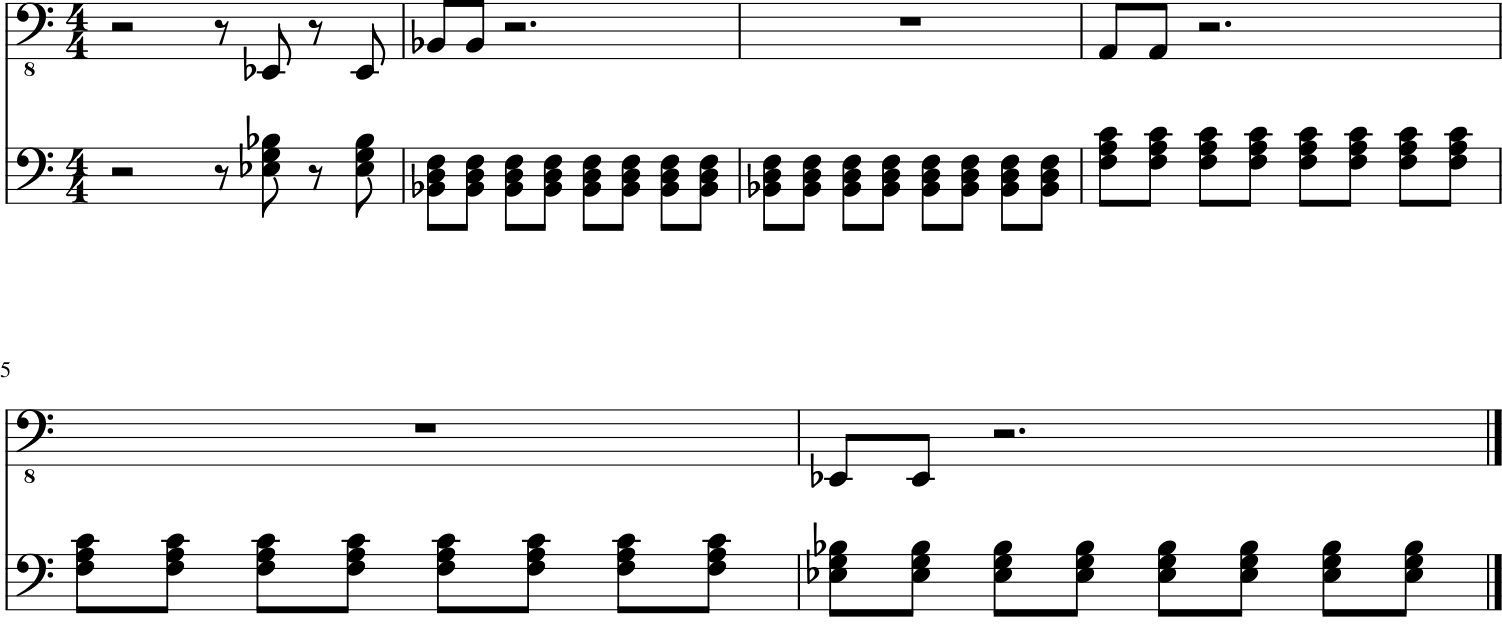

In [34]:
song.get_music21_repr().show()

In [35]:
song.get_music21_repr().show('midi')

In [36]:
predicted_song = pred.predict_song(song)

/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: Deprecatio

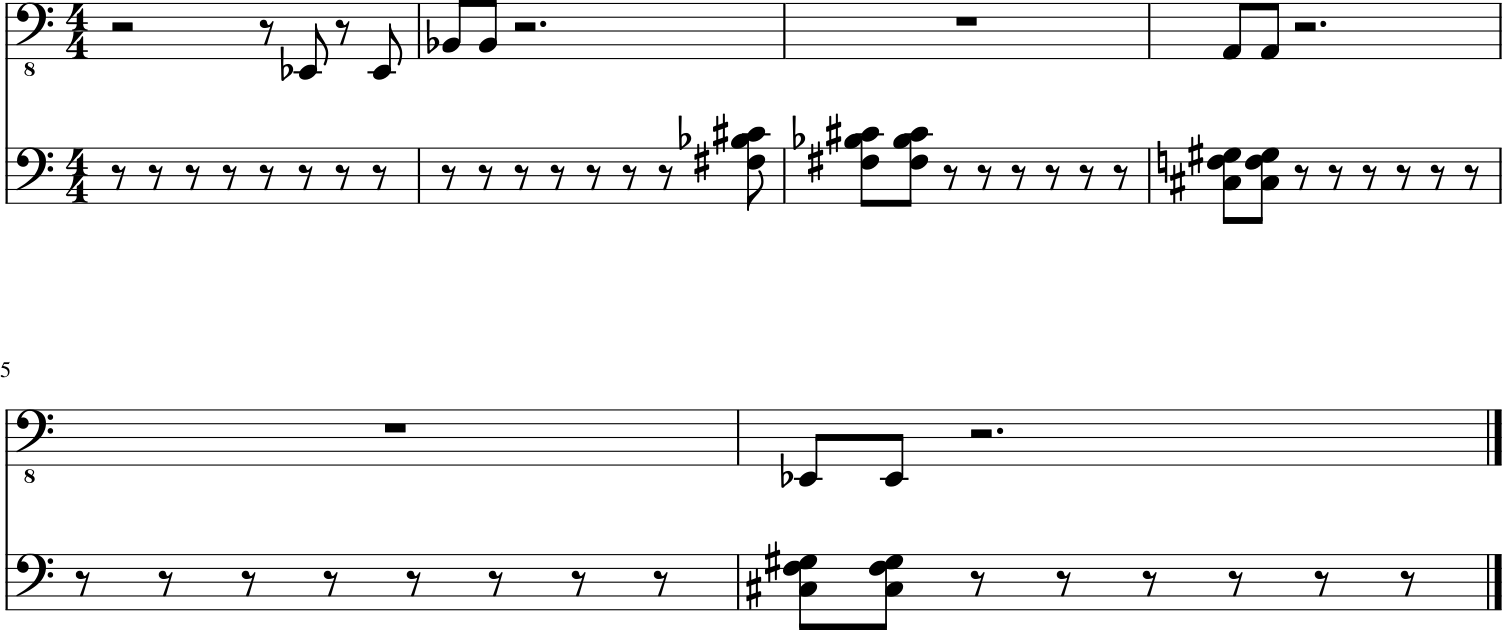

In [37]:
predicted_song.get_music21_repr().show()

In [38]:
predicted_song.get_music21_repr().show('midi')